## Visualize the trend of Enrollments in U.S over the 1990 to 2016 in different education level

Import libraries and define generic functions

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(x, y, style, xlabel, ylabel, title, label='', legend=None, pointlabel=False):
    plt.plot(x, y, style, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
      plt.legend()
    
    if pointlabel:
        for a,b in zip(x[::5], y[::5]):
            plt.text(a+0.2, b-0.5, str(b))


### Load data from CSV downloaded from  [NCES](https://nces.ed.gov/programs/digest/d18/tables/dt18_105.30.asp)


In [3]:
data = pd.read_csv('NCES_Enrollment_Data.csv', dtype={'Year':np.str, 'Total Enrollment':np.int32,
       'Elementary & Secondary enrollment':np.int32,
       'Public elementary and secondary':np.int32,
       'Private elementary and secondary schools':np.int32,
       'Degree-granting postsecondary institutions Total':np.int32,
       'Public post graduation colleges':np.int32, 'Private post graduation colleges':np.int32}, thousands=',')


#### Clean data

Clean 'Year' column as following for example

    1869-70 => 1869
    Fall 1959 => 1959

    And conver year column in integer


In [4]:
data['Year'] = data['Year'].replace(regex=r'(Fall )()', value='')
data['Year'] = data['Year'].replace(regex=r'()(-)(\d{2})*', value='')
data['Year'] = pd.to_numeric(data['Year'])


### Show total enrollment data from 1990-2016


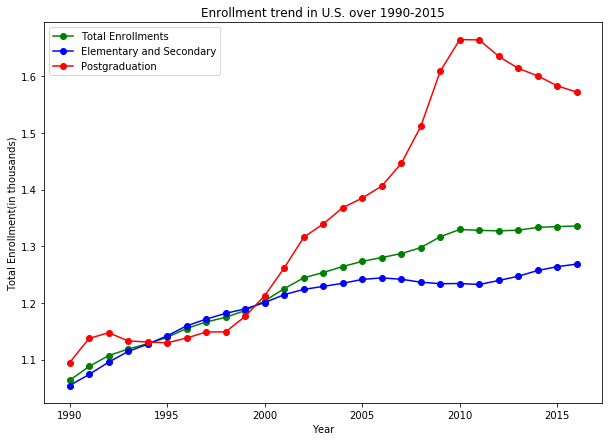

In [12]:
x = data['Year'][12:].values
y = data['Total Enrollment'][12:].div(data['Total Enrollment'].mean()).values
y1 = data['Elementary & Secondary enrollment'][12:].div(data['Elementary & Secondary enrollment'].mean()).values
y2 = data['Degree-granting postsecondary institutions Total'][12:].div(data['Degree-granting postsecondary institutions Total'].mean()).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment(in thousands)", "Enrollment trend in U.S.",label="Total Enrollments")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y1, '-ob', "Year", "Total Enrollment(in thousands)", "Enrollment trend in U.S.", label="Elementary and Secondary")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y2, '-or', "Year", "Total Enrollment(in thousands)", "Enrollment trend in U.S. over 1990-2015", label="Postgraduation", legend=True)
plt.show()


### Comapre enrollment growth over the years between postgraduation and secodary graduation


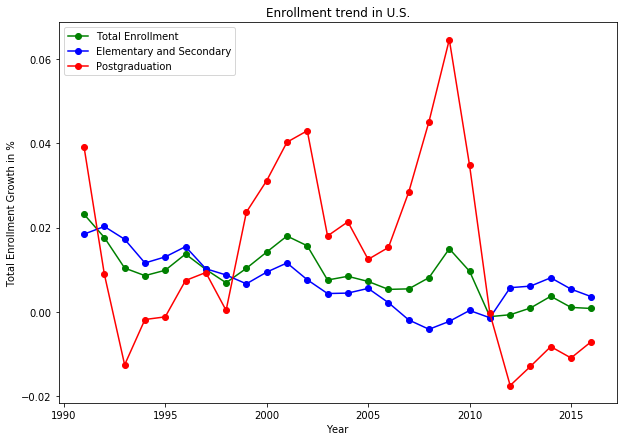

In [30]:
x = data['Year'][13:].values
y = data['Total Enrollment'].pct_change()[13:].values
y1 = data['Elementary & Secondary enrollment'].pct_change()[13:].values
y2 = data['Degree-granting postsecondary institutions Total'].pct_change()[13:].values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.", label='Total Enrollment')
plot_graph(x, y1, '-ob', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Elementary and Secondary")
plot_graph(x, y2, '-or', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Postgraduation", legend=True)

plt.show()
